<a href="https://colab.research.google.com/github/pranshubhardwaj22-oss/Data-Analysis-with-Python/blob/main/titanic_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic Dataset — Survival Analysis

**Deliverable:** Jupyter Notebook performing data cleaning, answering questions, and visualizations (bar charts & histogram).

In [ ]:
# Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# Load dataset
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(titanic.csv)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Basic info and missing values
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
# Cleaning: fill missing Age values with the median, drop duplicate PassengerId if any, and drop Cabin (too many missing)
df_clean = df.copy()
df_clean['Age'] = df_clean['Age'].fillna(df_clean['Age'].median())
df_clean = df_clean.drop(columns=['Cabin'])  # Cabin has many missing values
df_clean.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


## Who survived more: males or females?

In [ ]:
# Survival counts and rates by Sex
survival_by_sex = df_clean.groupby('Sex')['Survived'].agg(['sum','count'])
survival_by_sex['survival_rate'] = survival_by_sex['sum'] / survival_by_sex['count']
survival_by_sex

,sum,count,survival_rate
Sex,,,
female,233,314,0.742038
male,109,577,0.188908


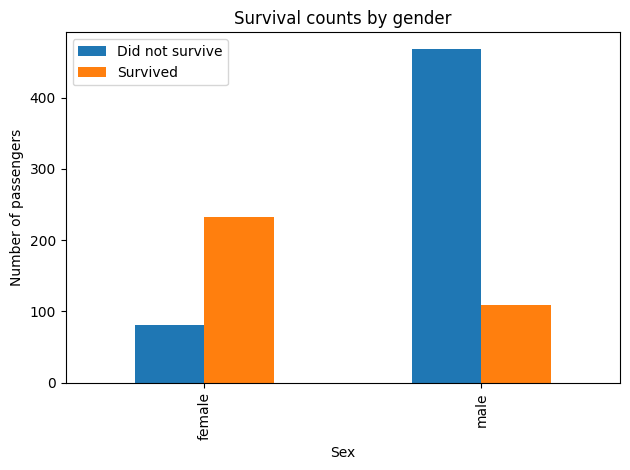

In [ ]:
# Bar chart: survival by gender (counts)
surv_counts = df_clean.groupby(['Sex','Survived']).size().unstack(fill_value=0)
surv_counts.plot(kind='bar', stacked=False)
plt.title('Survival counts by gender')
plt.xlabel('Sex')
plt.ylabel('Number of passengers')
plt.legend(['Did not survive','Survived'], loc='best')
plt.tight_layout()
plt.show()

## Did passenger class affect survival chances?

In [ ]:
# Survival rate by Pclass
survival_by_class = df_clean.groupby('Pclass')['Survived'].agg(['sum','count'])
survival_by_class['survival_rate'] = survival_by_class['sum'] / survival_by_class['count']
survival_by_class

,sum,count,survival_rate
Pclass,,,
1,136,216,0.629630
2,87,184,0.472826
3,119,491,0.242363


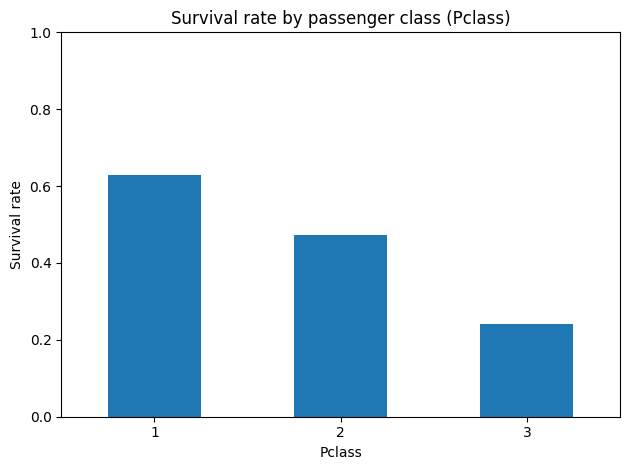

In [ ]:
# Bar chart: survival rate by class
survival_by_class['survival_rate'].plot(kind='bar')
plt.title('Survival rate by passenger class (Pclass)')
plt.xlabel('Pclass')
plt.ylabel('Survival rate')
plt.ylim(0,1)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## What was the survival rate by age group?

In [ ]:
# Create age groups and compute survival rate
bins = [0, 12, 18, 30, 50, 80]
labels = ['Child (0-12)','Teen (13-18)','Young Adult (19-30)','Adult (31-50)','Senior (51+)']
df_clean['age_group'] = pd.cut(df_clean['Age'], bins=bins, labels=labels, right=True)
survival_by_age_group = df_clean.groupby('age_group')['Survived'].agg(['sum','count'])
survival_by_age_group['survival_rate'] = survival_by_age_group['sum'] / survival_by_age_group['count']
survival_by_age_group

/tmp/ipython-input-797603949.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_age_group = df_clean.groupby('age_group')['Survived'].agg(['sum','count'])


,sum,count,survival_rate
age_group,,,
Child (0-12),40,69,0.579710
Teen (13-18),30,70,0.428571
Young Adult (19-30),148,447,0.331096
Adult (31-50),102,241,0.423237
Senior (51+),22,64,0.343750


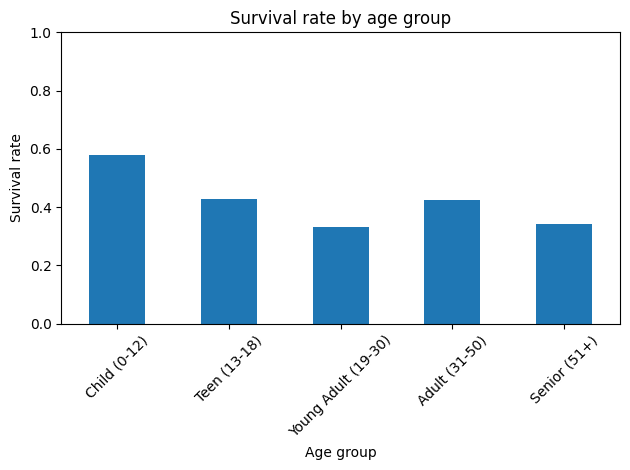

In [ ]:
# Bar chart: survival rate by age group
survival_by_age_group['survival_rate'].plot(kind='bar')
plt.title('Survival rate by age group')
plt.xlabel('Age group')
plt.ylabel('Survival rate')
plt.ylim(0,1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Histogram of passenger ages

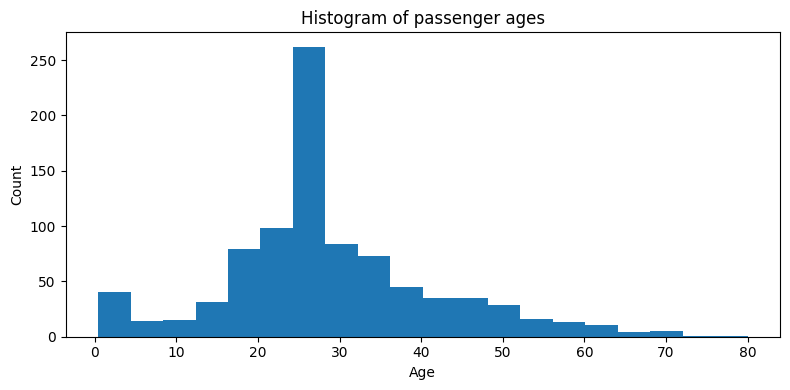

In [ ]:
# Histogram of passenger ages
plt.figure(figsize=(8,4))
plt.hist(df_clean['Age'].dropna(), bins=20)
plt.title('Histogram of passenger ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## Conclusion

- **Gender:** Females had a notably higher survival rate than males.
- **Class:** Higher passenger class (1st) had higher survival rates than lower classes.
- **Age groups:** Younger passengers (children and young adults) tended to have higher survival rates in general.